In [41]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns

scene_dir = os.path.join("datasets", "train", "scene_class")

In [44]:
filenames = os.listdir(scene_dir)
classes = []
for filename in filenames:
    with open(os.path.join(scene_dir, filename), "r") as f:
        line = f.readline()
        classes.append(line)



In [98]:
df = pd.DataFrame(dict(filenames=filenames, classes=classes))
grouped_df = (
    df.groupby("classes").count().reset_index("classes").sort_values("filenames")
)
grouped_df.set_index("classes").loc[
    [
        "office",
        "office_kitchen",
        "conference_room",
        "printer_room",
        "home_office",
        "reception_room",
        "bathroom",
        "bedroom",
        "living_room",
        "dining_room",
        "kitchen",
        "dinette"
    ]
].sum()


filenames    646
dtype: int64

In [46]:
import numpy as np


classes_np = np.asarray(classes)

['0439.txt',
 '0855.txt',
 '0238.txt',
 '1036.txt',
 '0627.txt',
 '0722.txt',
 '1269.txt',
 '1244.txt',
 '0427.txt',
 '0093.txt',
 '0223.txt',
 '0902.txt',
 '0232.txt',
 '0909.txt',
 '0275.txt',
 '1428.txt',
 '1381.txt',
 '1272.txt',
 '0224.txt',
 '1055.txt',
 '0871.txt',
 '0306.txt',
 '0876.txt',
 '0456.txt',
 '0147.txt',
 '0659.txt',
 '0739.txt',
 '1266.txt',
 '0253.txt',
 '1310.txt',
 '0416.txt',
 '0948.txt',
 '0495.txt',
 '0818.txt',
 '0496.txt',
 '0352.txt',
 '1136.txt',
 '0214.txt',
 '0703.txt',
 '0621.txt',
 '0952.txt',
 '0642.txt',
 '0235.txt',
 '0452.txt',
 '0007.txt',
 '0749.txt',
 '0450.txt',
 '0308.txt',
 '0713.txt',
 '0674.txt',
 '1040.txt',
 '0647.txt',
 '0930.txt',
 '0572.txt',
 '0682.txt',
 '0981.txt',
 '0321.txt',
 '1029.txt',
 '0900.txt',
 '1323.txt',
 '1319.txt',
 '0451.txt',
 '0673.txt',
 '0217.txt',
 '0651.txt',
 '0996.txt',
 '0065.txt',
 '1281.txt',
 '0098.txt',
 '0390.txt',
 '0140.txt',
 '1434.txt',
 '0653.txt',
 '0006.txt',
 '0744.txt',
 '1112.txt',
 '1375.txt',

In [22]:
labels, counts = np.unique(classes_np, return_counts=True)

In [27]:

# label_count = {label:count for label,count in zip(labels,counts)}
df = pd.DataFrame.from_dict({"labels":labels,"counts":counts})

<AxesSubplot: xlabel='counts', ylabel='labels'>

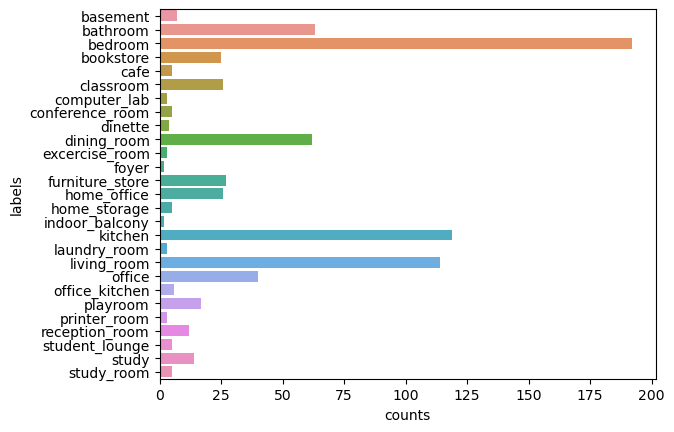

In [33]:
# df.hist()A
sns.barplot(data=df, y="labels", x="counts")

In [1]:
from src.dataset import NYUv2MultitaskDataset

img_dir = os.path.join( "datasets", "train", "rgb")
scene_dir = os.path.join( "datasets", "train", "scene_class")
mask_dir = os.path.join( "datasets", "train", "semantic_40")

# img_dir_test = os.path.join( "datasets", "test", "rgb")
# scene_dir_test = os.path.join( "datasets", "test", "scene_class")

ds = NYUv2MultitaskDataset(image_dir=img_dir, mask_dir=mask_dir,scene_dir=scene_dir)

/home/phondra/miniconda3/envs/sensors/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import numpy as np
np.all(ds.df["img"] == ds.df["masks"])

True

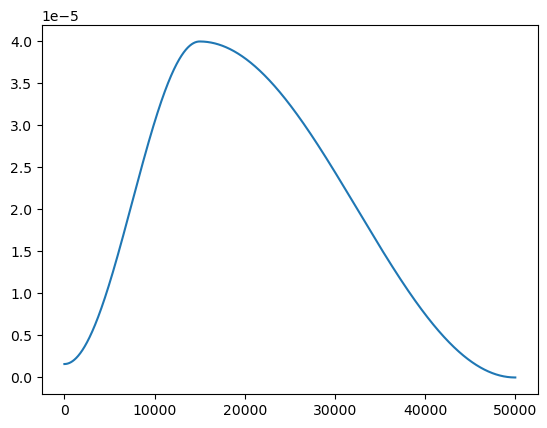

In [4]:
from matplotlib import pyplot as plt
import torch

lr = 1e-3
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=1.001)
epochs = 500
steps = 100
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=4e-5,
    epochs=epochs,
    steps_per_epoch=st499,
    # div_factor=25,
    # pct_start=0.1,
    # anneal_strategy="cos",
    # final_div_factor=1e4,
)
lrs = []
total_steps = epochs * steps
for epoch in range(epochs):
    for i in range(steps):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        #     print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
        scheduler.step()

plt.plot(range(total_steps), lrs)


In [13]:
lr = 1e-3
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=1.001)
epochs = 500
steps = 100
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    metrics="loss"
)
lrs = []
total_steps = epochs * steps
for epoch in range(epochs):
    for i in range(steps):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        #     print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
        scheduler.step()

plt.plot(range(total_steps), lrs)


TypeError: ReduceLROnPlateau.__init__() got an unexpected keyword argument 'metrics'

In [2]:
x = [
    0.95652174949646,
    0.8496732115745544,
    0.5227272510528564,
    0.7529411911964417,
    0.6627907156944275,
    0.31578946113586426,
    0.6226415038108826,
]


In [5]:
import numpy as np
np.mean(x)

0.669012154851641